# Introduccion al aprendizaje automatico

In [23]:
# pip3 install numpy
import numpy as np

In [24]:
a = np.array([2, 4, 6, 7])
b = np.array([1, 2, 1, 2])
a + b

array([3, 6, 7, 9])

In [25]:
for i in range(a.size):
    a[i] + b[i]

In [26]:
# pip3 install pandas
import pandas as pd

df = pd.read_csv('datos01_train.csv')

# Separar las variables (X) de las etiquetas (y)
X = df[['Variable1', 'Variable2']]
y = df['Clase']
df

,Variable1,Variable2,Clase
0,0.967030,0.547232,1.0
1,0.972684,0.714816,1.0
2,0.697729,0.216089,0.0
3,0.976274,0.006230,0.0
4,0.252982,0.434792,0.0
5,0.779383,0.197685,0.0
6,0.862993,0.983401,1.0
7,0.163842,0.597334,0.0
8,0.008986,0.386571,0.0
9,0.044160,0.956653,1.0


In [27]:
X

,Variable1,Variable2
0,0.967030,0.547232
1,0.972684,0.714816
2,0.697729,0.216089
3,0.976274,0.006230
4,0.252982,0.434792
5,0.779383,0.197685
6,0.862993,0.983401
7,0.163842,0.597334
8,0.008986,0.386571
9,0.044160,0.956653


In [28]:
y

0     1.0
1     1.0
2     0.0
3     0.0
4     0.0
5     0.0
6     1.0
7     0.0
8     0.0
9     1.0
10    1.0
11    1.0
12    0.0
13    0.0
14    1.0
15    1.0
16    0.0
17    0.0
18    1.0
19    1.0
Name: Clase, dtype: float64

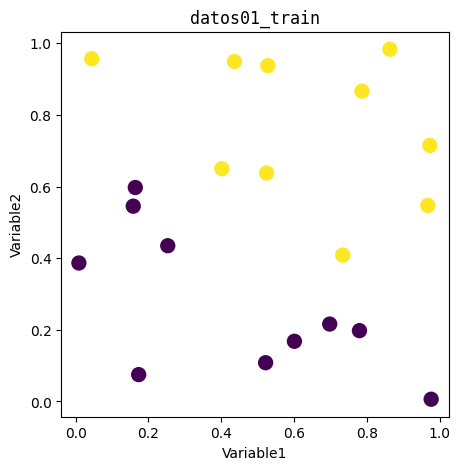

In [29]:
# pip3 install maptplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5)) # crear una figura
plt.scatter(df['Variable1'], # eje x
            df['Variable2'], # eje y
            c=df['Clase'], # utilizamos las clases para colorear
            s=100) # aumentar tamaño por defecto)
plt.title('datos01_train', family='monospace') # título
plt.xlabel('Variable1') # eje x
plt.ylabel('Variable2') # eje y
plt.show()

# Ejercicio de k-NN

Para cada ejemplo que se quiere clasificar hay que:
- Calcular la similitud entre el ejemplo y todos los datos del conjunto de entrenamiento.
- Ordenar los datos del conjunto de entrenamiento de más similar a menos.
- Seleccionar los datos más similares.
- Contar la frecuencia de cada clase entre los datos seleccionados.
- Asignar la clase más frecuente entre los datos seleccionados como clase del objeto a seleccionar.

¿Cómo calculamos esa similitud? Lo haremos con una distancia, siendo los objetos más similares aquellos que están más cerca. Contretamente utilizaremos la distancia euclídea que, dados dos puntos
e de dimensiones, se calculan como:</br>
 $\sqrt{\sum_{i=1}^{n} (x - y)^2}$

In [30]:
import numpy as np

def distancia_euclidea(x, y):
    return np.sqrt(np.sum((x - y)**2))

In [31]:
def visualizar_vecinos(X_train, y_train, dato_nuevo, indices_vecinos, clase):

    # Mostrar conjunto de entrenamiento
    plt.scatter(X_train[:, 0], 
                X_train[:, 1],
                c=y_train, 
                edgecolors='k', marker='o', s=100, label='Training')

    # Resaltar los vecinos más cercanos del punto
    plt.scatter(X_train[indices_vecinos, 0], 
                X_train[indices_vecinos, 1], 
                facecolors='none', 
                edgecolors='red', # rodear en rojo
                linewidths=2, 
                s=100, 
                label='Vecinos más cercanos')

    # Mostrar el nuevo dato que queremos clasficar
    plt.scatter(dato_nuevo[0], 
                dato_nuevo[1], 
                c=clase, 
                vmin=0, vmax=1,
                marker='x', s=200, label='Test Point')

    plt.title('Vecinos más cercanos de {}'.format(np.round(dato_nuevo, 2)))
    plt.xlabel('Variable1')
    plt.ylabel('Variable2')
    
    plt.gca().set_aspect('equal', adjustable='box')

    plt.show()

In [32]:
# Counter proporciona un diccionario donde cada elemento distinto se almacena 
# como claves con un valor asociado igual a su cuenta
from collections import Counter

# Recibe un conjunto de datos de entrenamiento junto con sus etiquetas reales, el nuevo dato que queremos clasificar y el número de vecinos que seleccionamos para hacerlo
def clasificar_dato_usando_knn(X_train, y_train, dato_nuevo, k=3):

    # Obtener todas las distancias
    distances = [distancia_euclidea(dato_nuevo, x_train) for x_train in X_train]

    # Seleccionar los objetos k más cercanos
    k_indices = np.argsort(distances)[:k]

    # Asignar las etiquetas
    k_nearest_labels = [y_train[i] for i in k_indices]

    # Seleccionar la clase a la que se asigna, 
    # que es la etiqueta más común entre los vecinos más cercanos
    most_common = Counter(k_nearest_labels).most_common(1)

    # Visualizar la iteración
    visualizar_vecinos(X_train, y_train, dato_nuevo, k_indices, most_common[0][0])

    # Devolver la clase
    return most_common[0][0]

# Realizamos la clasificación para todos los datos del conjunto de test
def aplicar_kNN_datos_nuevos(X_test, X_train, y_train, k=3):
    
    # Crear un array inicialmente vacío para almacenar las classes en cada iteración
    predicted_labels = np.empty(X_test.shape[0], dtype=int)

    # Clasficar cada punto del conjunto de test
    for i, x_test in enumerate(X_test):
        predicted_labels[i] = clasificar_dato_usando_knn(X_train, y_train, x_test, k)

    # Almacenar para cada objeto la clase que se le ha asignado
    df = pd.DataFrame(X_test)
    df['pred_class'] = predicted_labels

    return df

Ahora nos llegarán los datos de los cuales no conocemos la clase (`datos01_test.cvs`). La gracia será calcular la distancia euclidea para cada uno de estos puntos y asi aproximar a que clase pertenece.

In [33]:
# Cargar el conjunto de datos nuevos
df_test = pd.read_csv('datos01_test.csv')

# Separar las variables (X) de las etiquetas (y)
X_test = df_test[['Variable1', 'Variable2']]

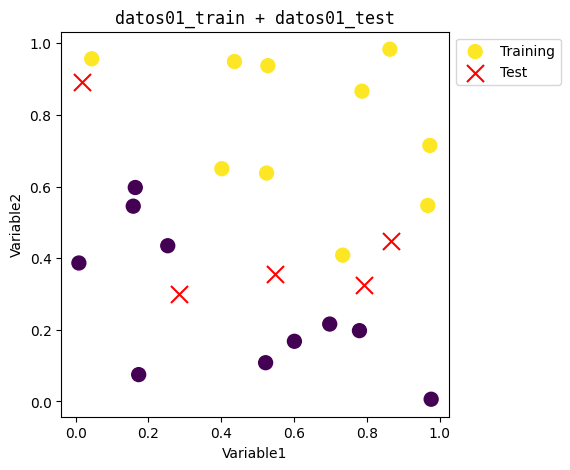

In [34]:
plt.figure(figsize=(5, 5))

# Los datos del conjunto de entrenamiento
plt.scatter(df['Variable1'], 
            df['Variable2'], 
            c=df['Clase'], 
            s=100, 
            label='Training')

# Los datos que queremos clasificar
plt.scatter(df_test['Variable1'], 
            df_test['Variable2'], 
            color='red', 
            marker='x', # marcar como X en vez de puntos
            s=150, 
            label='Test')

plt.title('datos01_train + datos01_test', family='monospace')
plt.xlabel('Variable1') 
plt.ylabel('Variable2') 

# Incluir leyenda
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

Ahora vemos como los datos a clasificar se muestran en la gráfica con una cruz.

A continuación se llamará a la función de los vecinos para categorizar dichos datos. El procedimiento es el siguiente:
- Se llama a la funcion `aplicar_kNN_datos_nuevos` con los datos de prueba y los base
- Se calculan las distancias euclideas de todos los puntos
- Para cada punto se obtienen los *k* puntos más cercanos 
- Se clasifica el dato de prueba teniendo en cuenta el mayor números de puntos cercanos de cada clase
- Se le asigna la clase al punto y se muestra en la gráfica.

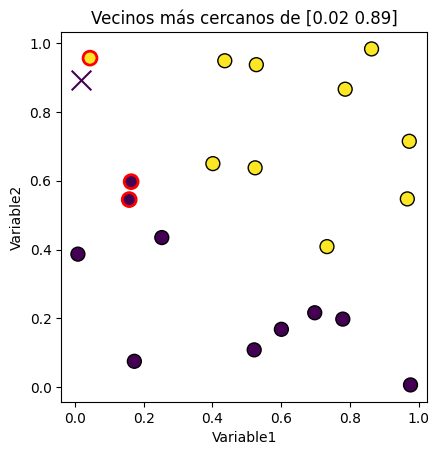

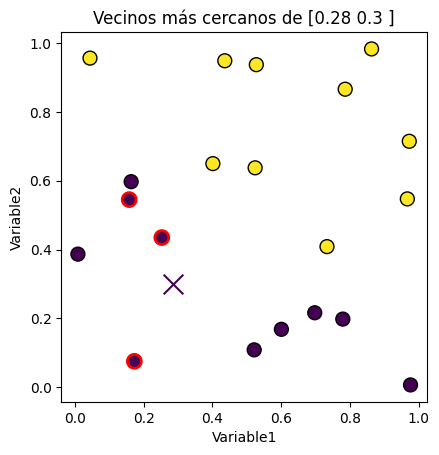

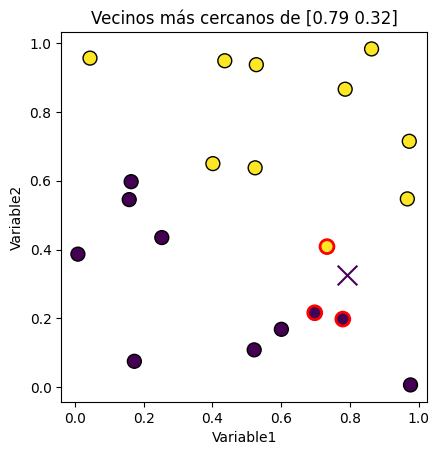

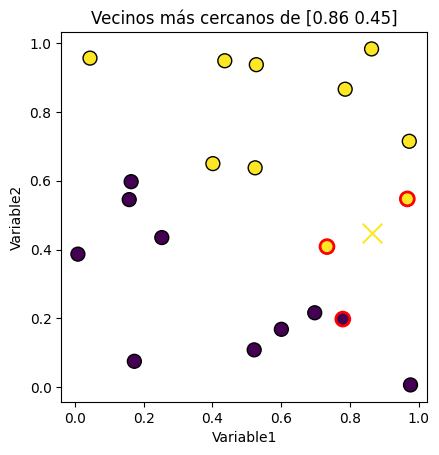

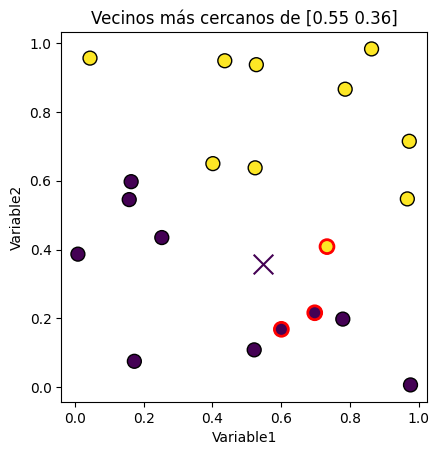

,0,1,pred_class
0,0.017490,0.891573,0
1,0.284861,0.298976,0
2,0.792034,0.324471,0
3,0.864710,0.447513,1
4,0.548230,0.357172,0


In [35]:
resultados_k3 = aplicar_kNN_datos_nuevos(X_test.values, X.values, y.values)
resultados_k3

Ahora veremos como son las predicciones cuando `k = 7`.

Podemos ver como los resultados cambiand dependiendo de la k que se use.

**OJO: Hay que tener en cuenta que la k normalmente van a ser números impares para que no existan empates**

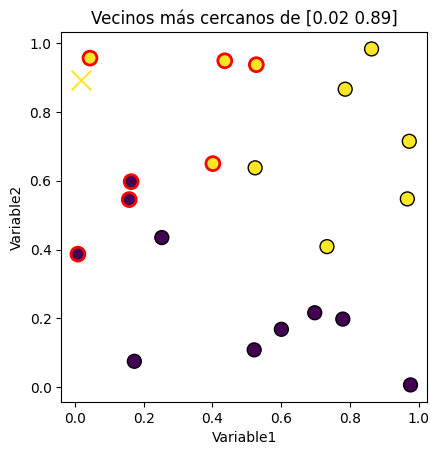

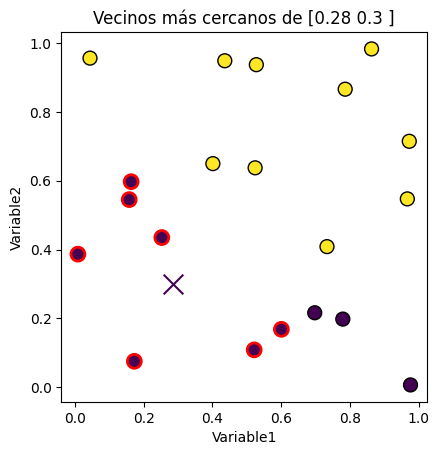

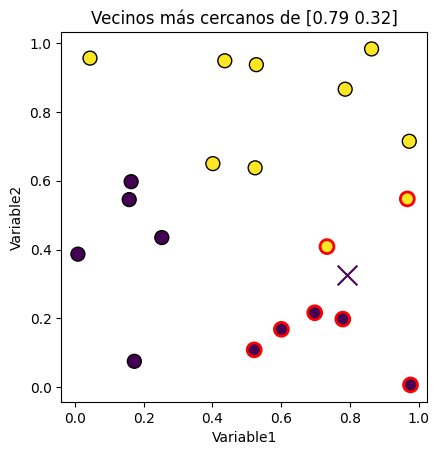

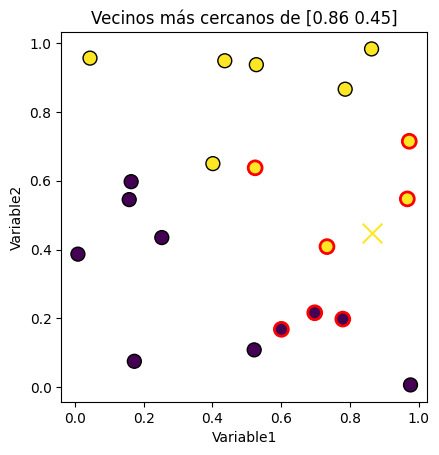

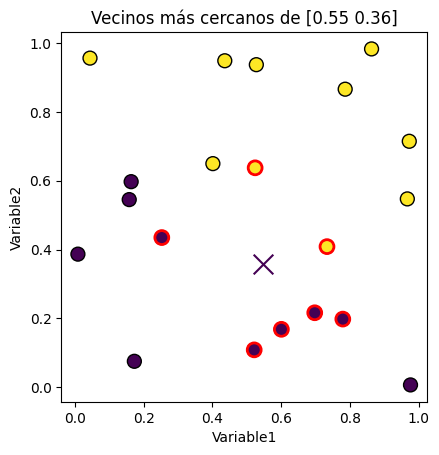

,0,1,pred_class
0,0.017490,0.891573,1
1,0.284861,0.298976,0
2,0.792034,0.324471,0
3,0.864710,0.447513,1
4,0.548230,0.357172,0


In [36]:
resultados_k7 = aplicar_kNN_datos_nuevos(X_test.values, X.values, y.values, 7)
resultados_k7

# SKLEARN

## K vecinos mas cercanos

In [37]:
# pip3 install scikit-learn
import sklearn

In [38]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciar un objeto modelo
modelo = KNeighborsClassifier(n_neighbors=3)
# Ajustar el modelo
modelo.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

Una vez entrenado el modelo, podemos predecir la clase de nuevos datos utilizando el método `.predict()`:

In [39]:
# Cargar el conjunto de datos nuevos
df_test = pd.read_csv('datos01_test.csv')

# Separar las variables (X) de las etiquetas (y)
X_test = df_test[['Variable1', 'Variable2']]

# Clasificar los objetos nuevos
modelo.predict(X_test)

array([0., 0., 0., 1., 0.])

Ademas del `.predict()` tenemos `.predict_proba()` que nos devuelve las probabilidades de que un objeto pertencezca a una clase o a otra.

In [45]:
# Cargar el conjunto de datos nuevos
df_test = pd.read_csv('datos01_test.csv')

# Separar las variables (X) de las etiquetas (y)
X_test = df_test[['Variable1', 'Variable2']]

# Obtener las probabilidades de la clasificación
modelo.predict_proba(X_test)

array([[0.66666667, 0.33333333],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333]])

Si los comparamos con nuestro modelo (`resultados_k3`) podemos ver como salen los mismos resultados.

In [46]:
resultados_k3['pred_class']

0    0
1    0
2    0
3    1
4    0
Name: pred_class, dtype: int64

## Evaluacion del modelo

Ahora obtenemos las etiquetas reales de los datos de prueba a clasificar para ver como de bueno es el modelo entrenado.

In [47]:
y_test = pd.read_csv('datos01_test_etiquetas.csv')
y_test = y_test.values.ravel()
y_test

array([0, 0, 1, 1, 0])

Ahora hacemos la prediccion como hicimos anteriormente.

In [48]:
# Pronosticar las etiquetas
y_pred = modelo.predict(X_test)
y_pred

array([0., 0., 0., 1., 0.])

Ahora mostraremos los datos de forma grafica para un analisis mas sencillo.

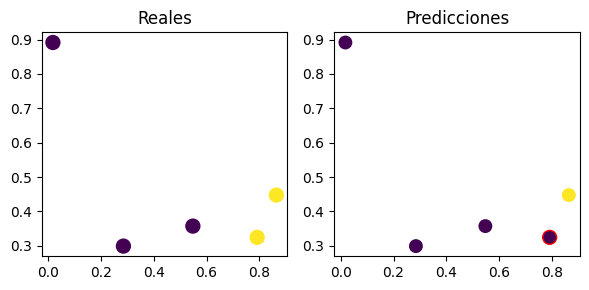

In [49]:
# Crear la figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

# Subplot para ver las clases reales
axes[0].scatter(df_test['Variable1'], 
                df_test['Variable2'], 
                c=y_test, 
                s=100)
axes[0].set_title('Reales')

# Subplot para ver las clases pronosticadas
# borde vacío de los puntos inicialmente
ec = np.array(['none'] * len(df_test)) 
# si es fallo poner borde rojo
ec[y_test != y_pred] = 'r' 
# Ver las predicciones
axes[1].scatter(df_test['Variable1'], 
                df_test['Variable2'], 
                c=y_pred, 
                s=100, 
                edgecolors=ec)
axes[1].set_title('Predicciones')

plt.tight_layout()
plt.show()

Esta forma de análisis no es viable cuando tenemos miles de datos. Por lo tanto tendremos que usar la propiedad de `accuracy`, que se calcula sobre la `matriz de confusion` (matriz que determina cuantas veces se acierta para cada etiqueta de los datos clasificados).

Tener en cuenta que la matriz de confusión se forma de la siguiente forma:
- Diagonal principal (Verdaderos positivos - VP, Verdaderos negativos - VN)
- Diagonal secundaria (Falsos positivos - FP, Falsos negativos - FN)

La `accuracy` se calculará de la siguiente forma: `accuracy = VP / (VP + FP)`

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Matriz de confusión:\n', conf_matrix)

Accuracy: 0.80
Matriz de confusión:
 [[3 0]
 [1 1]]


### Ejercicio

Entrena un modelo utilizando el conjunto de datos disponible en `datos02_train.csv` con *k = 3*. Visualiza los resultados y calcula el valor de la `accuracy` usando los datos almacenados en `datos02_test.csv` y sus correspondientes etiquetas en `datos02_test_etiquetas.csv`. Después entrena otro modelo modificando la métrica con la que se realiza el cómputo de la distancia. Prueba con la distancia Manhattan y analiza si has obtenido los mismos resultados. Puedes consultar los parámetros neceesarios para cambiar la forma de medir la similitud en la [documentación](https://www.campusvirtual.uniovi.es/mod/resource/view.php?id=235789).

In [66]:
# Cargamos los datos de entrenamiento
df = pd.read_csv('datos02_train.csv')

# Separar las variables (X) de las etiquetas (y)
X = df[['Variable1', 'Variable2']]
y = df['Clase']

# Entrenamos el modelo
modelo = KNeighborsClassifier(n_neighbors=3)
modelo.fit(X, y)

# Cargamos los datos de test
df_test = pd.read_csv('datos02_test.csv')

# Separar las variables (X) de las etiquetas (y)
X_test = df_test[['Variable1', 'Variable2']]

# Obtener las probabilidades de la clasificación
print("predict(): \n", modelo.predict(X_test))
print('############################################')
print("predict_proba(): \n", modelo.predict_proba(X_test))

predict(): 
 [0. 1. 0. 0. 1.]
############################################
predict_proba(): 
 [[1.         0.        ]
 [0.         1.        ]
 [1.         0.        ]
 [0.66666667 0.33333333]
 [0.33333333 0.66666667]]


Ahora cargamos el fichero con las etiquetas de los datos ya clasificados (reales).

In [70]:
y_test = pd.read_csv('datos02_test_etiquetas.csv')
y_test = y_test.values.ravel()

# Transformar las etiquetas a números
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test = le.fit_transform(y_test)


y_test

array([0, 1, 0, 0, 1])

Ahora pronosticamos las etiquetas con el modelo entrenado posteriormente.

In [68]:
# Pronosticar las etiquetas
y_pred = modelo.predict(X_test)
y_pred

array([0., 1., 0., 0., 1.])

Ahora visualizamos los datos de forma grafica, con la prediccion y los datos reales.

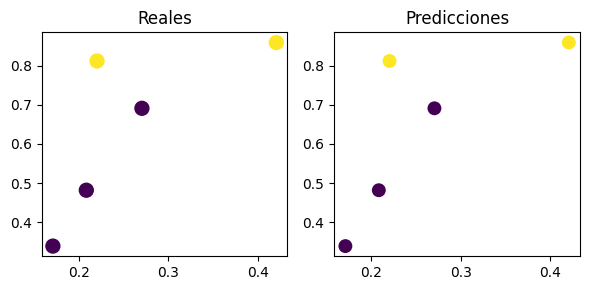

In [71]:
# Crear la figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

# Subplot para ver las clases reales
axes[0].scatter(df_test['Variable1'], 
                df_test['Variable2'], 
                c=y_test, 
                s=100)
axes[0].set_title('Reales')

# Subplot para ver las clases pronosticadas
# borde vacío de los puntos inicialmente
ec = np.array(['none'] * len(df_test)) 
# si es fallo poner borde rojo
ec[y_test != y_pred] = 'r' 
# Ver las predicciones
axes[1].scatter(df_test['Variable1'], 
                df_test['Variable2'], 
                c=y_pred, 
                s=100, 
                edgecolors=ec)
axes[1].set_title('Predicciones')

plt.tight_layout()
plt.show()

Podemos ver como todos los datos pronosticados coinciden con los reales, por tanto teoricamente la `accuracy` deberia ser de 1. Por tanto vamos a ver si esto se cumple con la matriz de incertidumbre:

In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Matriz de confusión:\n', conf_matrix)

Accuracy: 1.00
Matriz de confusión:
 [[3 0]
 [0 2]]


Podemos ver como realmente sale que tenemos una `accuracy = 1`.

## Incrementando el numero de variables

In [74]:
df_train = pd.read_csv('datos03_train.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x.1     1600 non-null   float64
 1   x.2     1600 non-null   float64
 2   x.3     1600 non-null   float64
 3   x.4     1600 non-null   float64
 4   Clase   1600 non-null   object 
dtypes: float64(4), object(1)
memory usage: 62.6+ KB


Podemos ver como ahora tenemos 4 variables.

In [75]:
df_train.describe()

,x.1,x.2,x.3,x.4
count,1600.000000,1600.000000,1600.000000,1600.000000
mean,0.008112,-0.017286,-0.024780,-0.003261
std,0.578455,0.576607,0.569985,0.572191
min,-0.999401,-0.999467,-0.999575,-0.997903
25%,-0.458114,-0.522156,-0.514393,-0.485499
50%,-0.004972,-0.022612,-0.045641,-0.017759
75%,0.512347,0.463921,0.452209,0.482743
max,0.999711,0.999206,0.997743,0.999351


Ahora al tener mas de 2 variables no podemos hacer una comparacion visual de la misma forma que haciamos hasta ahora. Por ello tendremos que usar el paquete `seaborn`:

           x.1       x.2       x.3       x.4 Clase
0     0.194393 -0.446088 -0.280983  0.452003    c1
1     0.530410  0.384990 -0.201658 -0.328956    c1
2    -0.191110 -0.066500 -0.570583  0.827314    c1
3    -0.028563  0.818730  0.891707  0.879504    c2
4    -0.447331  0.771634 -0.900059 -0.611920    c2
...        ...       ...       ...       ...   ...
1595 -0.262227  0.675743  0.557198 -0.112407    c1
1596  0.936548  0.882840 -0.081916  0.994050    c2
1597 -0.314613  0.294722 -0.344241  0.481514    c1
1598  0.091555  0.883770  0.762453  0.794923    c2
1599  0.977689  0.799913  0.328875  0.648410    c2

[1600 rows x 5 columns]


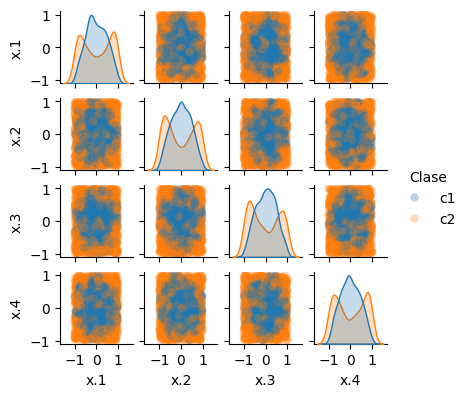

0       c1
1       c1
2       c1
3       c2
4       c2
        ..
1595    c1
1596    c2
1597    c1
1598    c2
1599    c2
Name: Clase, Length: 1600, dtype: category
Categories (2, object): ['c1', 'c2']


In [79]:
# pip3 install seaborn
import seaborn as sns

# pd.Categorical lo que hace es convertir la variable a categórica, es decir, para cada columna de la tabla, se crea un diccionario con los valores únicos y se asigna un número a cada uno de ellos
df_train['Clase'] = pd.Categorical(df_train['Clase'], categories=['c1', 'c2'])
sns.pairplot(df_train, # conjunto de datos
            hue='Clase', # variable para colorear
            height=1, # altura del gráfico
            aspect=1, # proporción (cuadrado)
            plot_kws={ # argumentos elementos del gráfico
                'alpha':0.3, # transparencia
                'edgecolor': 'none' # quitar bordes de los puntos
            })

plt.show()

Ahora hacemos la separacion de las variables y la clase como siempre:

In [86]:
X_train = df_train.drop('Clase', axis = 1) # axis = 1 para eliminar columnas y .drop() para eliminar la columna 'Clase'
y_train = df_train['Clase'].values.ravel() # .ravel() para convertir a array 1D (potencialmente array 2D del .values)

Definimos el modelo y lo entrenamos utilizando estos datos:

In [87]:
# Entrenar el modelo
modelo = KNeighborsClassifier(n_neighbors=3)
modelo.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Ahora cargamos los datos que queremos predecir (`datos03_test.cvs`) y los separamos en las distintas variables:

In [88]:
# Cargar los datos para evaluar el modelo
df_test = pd.read_csv('datos03_test.csv')
X_test = df_test.drop('Clase', axis = 1)
y_test = df_test[['Clase']].values.ravel()

Veamos como estos datos siguen los mismos patrones que los datos de entrenamiento:

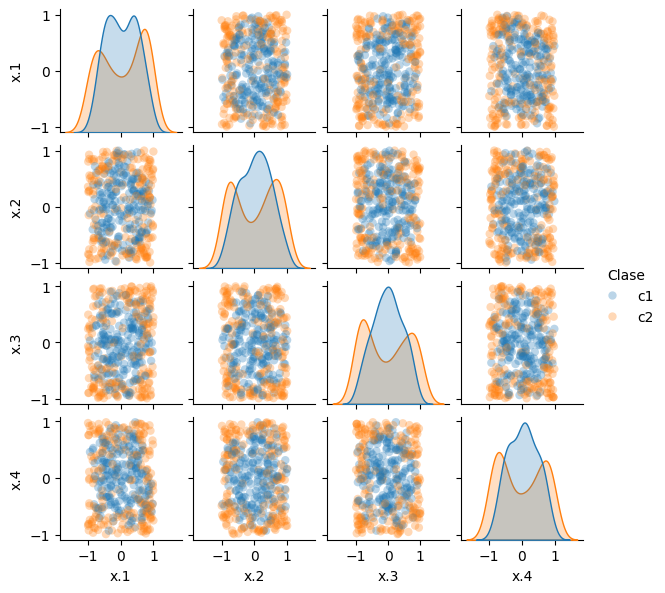

In [89]:
df_test['Clase'] = pd.Categorical(df_test['Clase'], categories=['c1', 'c2'])
sns.pairplot(df_test, hue='Clase', height=1.5, aspect=1, 
            plot_kws={'alpha':0.3, 'edgecolor': 'none'})
plt.show()

Ahora ya podemos predecir las clases de los datos de prueba a categorizar:

In [90]:
y_pred = modelo.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'La accuracy es: {accuracy:.2f}')
print('Matriz de confusión:\n', conf_matrix)

La accuracy es: 0.90
Matriz de confusión:
 [[190  13]
 [ 29 168]]


Para ahorrarnos tiempo de entrenar modelos y obtener la accuracy vamos a definir una funcion para reusar el codigo de forma mas eficiente:

In [91]:
def entrenar_y_obtener_accuracy(X_train, y_train, X_test, y_test, k=3):
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f'La accuracy es: {accuracy:.2f}')
    print('Matriz de confusión:\n', conf_matrix)
    return modelo, y_pred

Un ejemplo sera el siguiente (ultimo ejemplo de entrenamiento):

In [92]:
modelo, y_pred = entrenar_y_obtener_accuracy(X_train, y_train, X_test, y_test)

La accuracy es: 0.90
Matriz de confusión:
 [[190  13]
 [ 29 168]]


# Sensibilidad al ruido

Ahora vamos a ver como afecta el ruido en las muestras de datos al `k vecinos`. Para ello cargamos la muestra de `datos04_train.csv` para realizar la evaluacion:

In [93]:
# Datos de entrenamiento
df_train = pd.read_csv('datos04_train.csv')
print(df_train.describe())
print(df_train.shape)
# Datos de evaluación
df_test = pd.read_csv('datos04_test.csv')
X_test = df_test.drop('Clase', axis = 1)
y_test = df_test[['Clase']].to_numpy().ravel()

               x.1          x.2          x.3          x.4
count  1600.000000  1600.000000  1600.000000  1600.000000
mean      0.013054    -0.012578    -0.021303    -0.004553
std       0.612387     0.610840     0.602556     0.608505
min      -1.495417    -1.511739    -1.387723    -1.356776
25%      -0.481869    -0.510199    -0.528878    -0.494707
50%      -0.006654    -0.000381    -0.033901    -0.000260
75%       0.521687     0.482118     0.451676     0.477508
max       1.523088     1.552849     1.548336     1.593148
(1600, 5)


Ahora veamos como se representan los datos en las graficas de variables par a par:

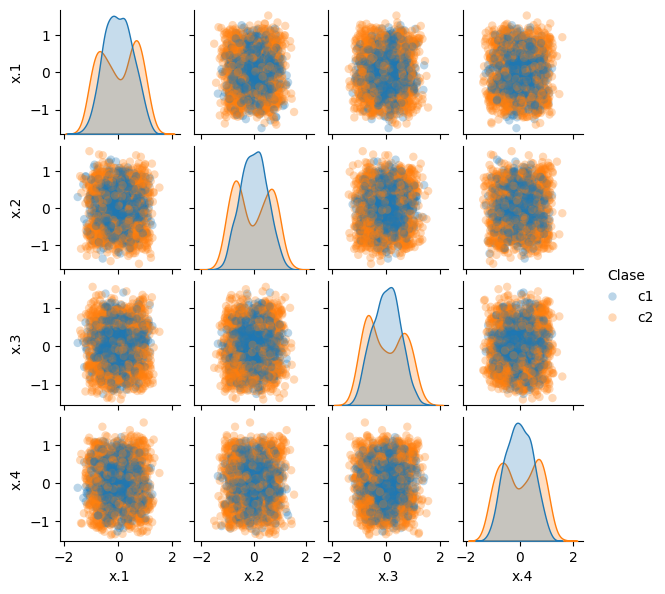

In [94]:
df_train['Clase'] = pd.Categorical(df_train['Clase'], categories=['c1', 'c2'])
sns.pairplot(df_train, hue='Clase', height=1.5, aspect=1, 
            plot_kws={'alpha':0.3, 'edgecolor': 'none'})
plt.show()

Podemos ver como los datos para las variables par a para ahora se superponen mucho mas. Y ahora calcularemos la `accuracy` para este nuevo modelo:

In [95]:
# Dividir el conjunto de datos en variables (X) y clase (y):
X_train = df_train.drop('Clase', axis = 1)
y_train = df_train[['Clase']].to_numpy().ravel()
# Entrenar el modelo
modelo, y_pred = entrenar_y_obtener_accuracy(X_train, y_train, X_test, y_test)

La accuracy es: 0.74
Matriz de confusión:
 [[159  44]
 [ 60 137]]


Ahora usaremos la muestra de `datos03_train.cvs` y le añadiremos nuevas variables y valores de forma totalmente aleatoria, veremos como en principio la `accuracy` deberia de disminuir debido al ruido introducido a la muestra de entrenamiento del modelo:

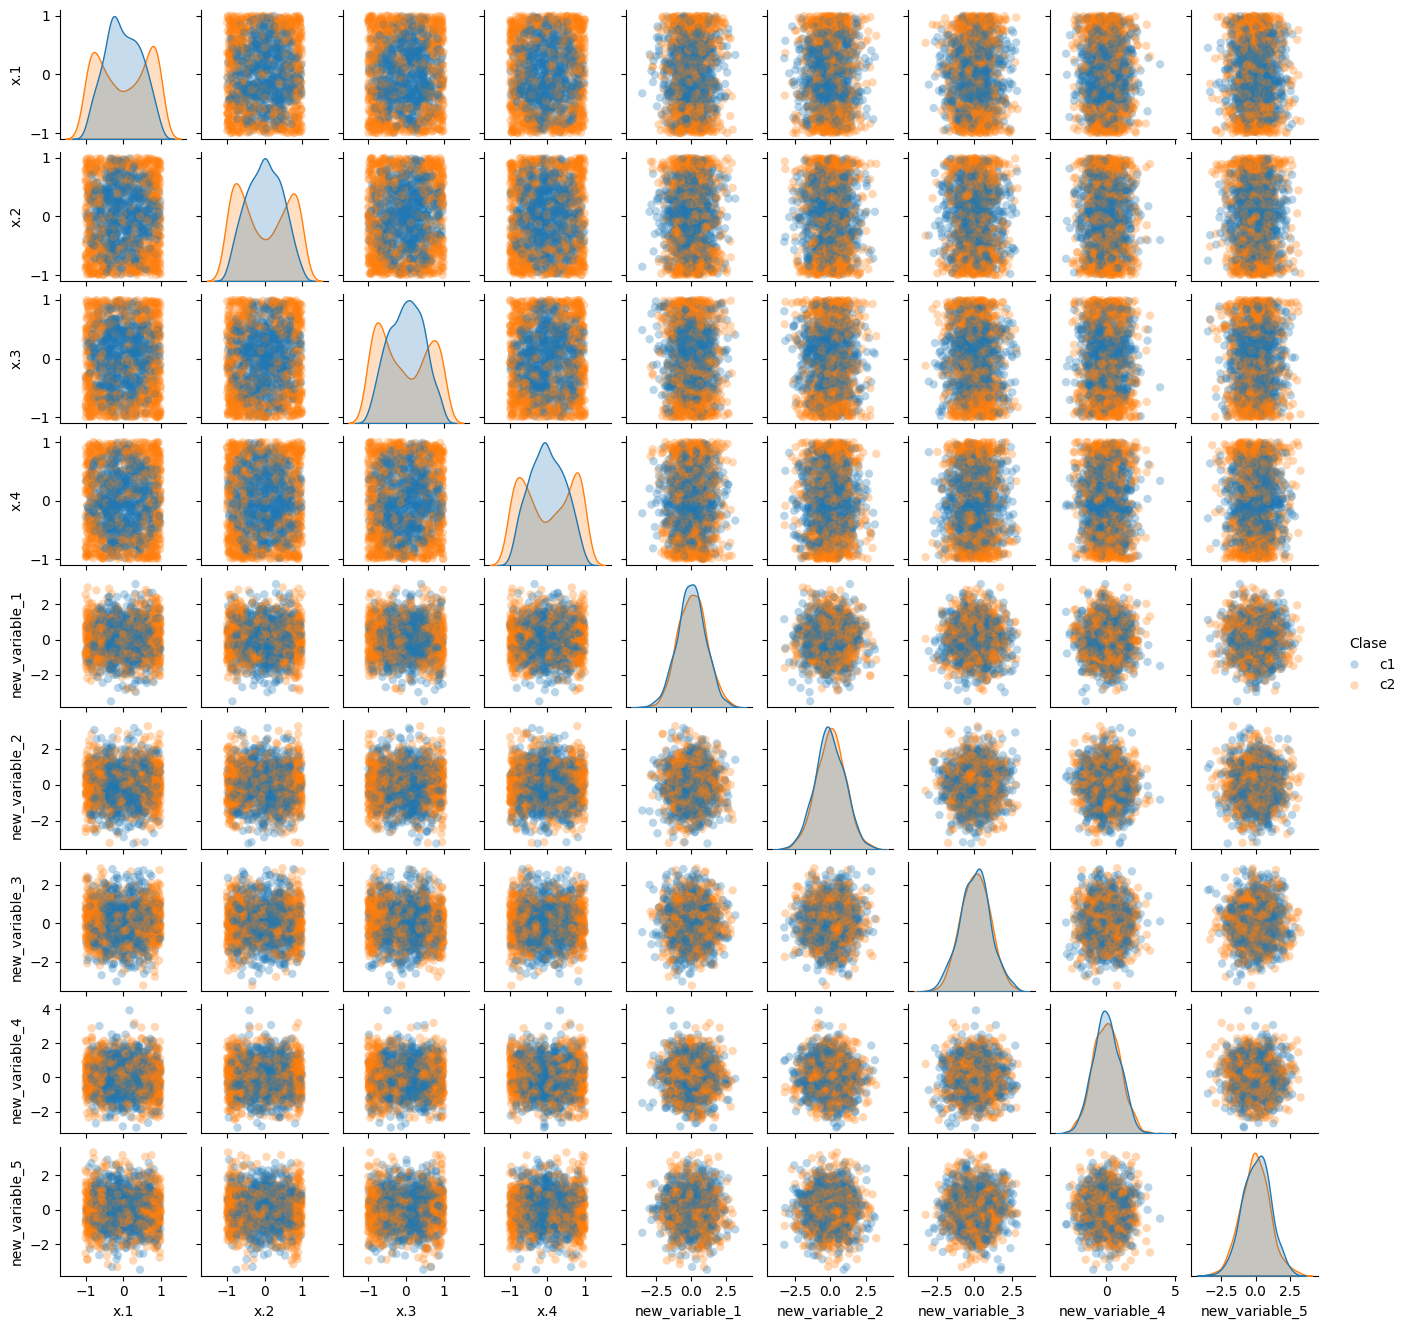

In [96]:
# Usando las variables que ya tenemos definidas
df_train = pd.read_csv('datos03_train.csv')
df_test = pd.read_csv('datos03_test.csv')

np.random.seed(29) # garantizar reproducibilidad

# Añadir 5 columnas con datos completamente aleatorios
for i in range(1, 6):
    column_name = f'new_variable_{i}'
    df_train[column_name] = np.random.randn(len(df_train)) 
    df_test[column_name] = np.random.randn(len(df_test))

df_train['Clase'] = pd.Categorical(df_train['Clase'], categories=['c1', 'c2'])
sns.pairplot(df_train, hue='Clase', height=1.5, aspect=1, plot_kws={'alpha':0.3, 'edgecolor': 'none'})
plt.show()

In [97]:
# Creamos conjunto de training
X_train = df_train.drop('Clase', axis = 1).values
y_train = df_train[['Clase']].to_numpy().ravel()

# Creamos conjunto de test
X_test = df_test.drop('Clase', axis = 1).values
y_test = df_test[['Clase']].values

modelo, y_pred = entrenar_y_obtener_accuracy(X_train, y_train, X_test, y_test)

La accuracy es: 0.62
Matriz de confusión:
 [[162  41]
 [111  86]]


Vemos como la `accuracy` ahora es aun menos. Por tanto podemos demostrar que el ruido en los datos es un problema al usar el `k vecinos`.

# Preprocesado

## Escalado de las variables predictorias

Vamos a ver como afecta el hecho de que las variables vengan en diferentes escalas. Para ello cargamos la muestra de datos `datos05_train.cvs`:

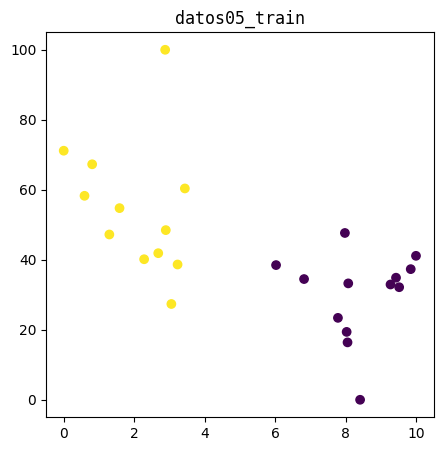

In [98]:
# Cargar los datos de entrenamiento
df_train = pd.read_csv('datos05_train.csv')
X_train = df_train[['Variable1', 'Variable2']]
y_train = df_train['Clase']

# Visualizar el conjunto de datos
plt.figure(figsize=(5, 5))
plt.scatter(df_train['Variable1'], df_train['Variable2'], c=df_train['Clase'])
plt.title('datos05_train', family='monospace')
plt.show()

Ahora mostramos un nuevo punto en el grafico que sera el punto a clasificar:

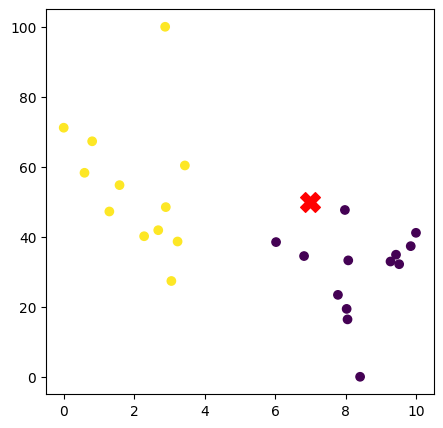

In [100]:
# El nuevo punto que queremos clasificar
# Creamos un conjunto de datos de una única fila
# También podríamos utilizar un array de numpy pero nos da un warning de que
# el modelo se ha entrenado con nombres de columnas y el objeto a pronosticar no tiene
new_point = pd.DataFrame([[7, 50]], columns=X_train.columns) 

plt.figure(figsize=(5, 5))
# El conjunto de datos
plt.scatter(X_train['Variable1'], 
            X_train['Variable2'], 
            c=y_train, label = 'datos05_train')
# El nuevo punto
plt.scatter(new_point['Variable1'],
            new_point['Variable2'], 
            c='red', marker='X', s=200, label='Nuevo')
plt.show()

Cuando hacemos la clasificacion del punto vamos a ver como pertenece a la clase 1, es decir, a la de los puntos amarillos:

In [101]:
# Entrenar el modelo
modelo = KNeighborsClassifier(n_neighbors=3)
modelo.fit(X_train, y_train)
# Clasificar el nuevo objeto
predicted_class = modelo.predict(new_point)
print("El punto es de clase:", predicted_class)

El punto es de clase: [1.]


Si lo representamos en un grafico vemos como los puntos marcados como mas cercanos son los que estan a la altura mas cercana a la del punto. Esto es debido a la escala, ya que la escala del eje Y es mucho mayor a la del eje X.

[[21 16 17]]
    Variable1  Variable2
21   7.982266  47.658696
16   2.897759  48.476780
17   1.295575  47.225658


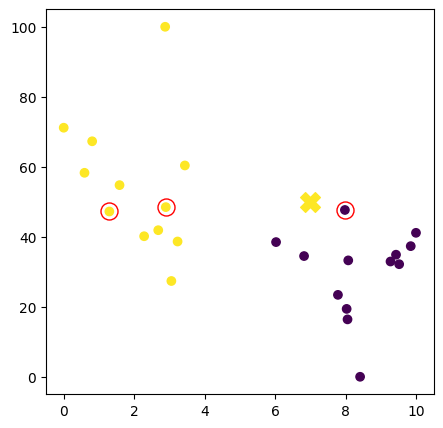

In [102]:
# Encontrar los índices de los objetos del conjunto de entrenamiento que son los vecinos más cercanos
indices = modelo.kneighbors(new_point, n_neighbors = 3, return_distance=False) 
print(indices)
print(X_train.iloc[indices[0]])


# Iniciar visualización 
plt.figure(figsize=(5, 5))

# Resaltar los vecinos más cercanos
plt.scatter(X_train.loc[indices[0], 'Variable1'], 
            X_train.loc[indices[0], 'Variable2'],  
            marker='o', s=150, label='Nearest Neighbors', 
            edgecolor = 'red', c = 'white')
# Visualizar el conjunto de datos
plt.scatter(df_train['Variable1'], 
            df_train['Variable2'], 
            c=df_train['Clase'], 
            label = 'datos05_train')
# Visualizar el nuevo punto
plt.scatter(new_point['Variable1'], 
            new_point['Variable2'], 
            c=predicted_class,  marker='X', 
            s=200, label='Nuevo', vmin=0, vmax=1)


plt.show()

Si escalasemos los dos ejes para que tengan la misma escala y dibujamos un circulo de aproximacion podemos ver como los puntos mas cercanos son realmente esos marcados con anterioridad:

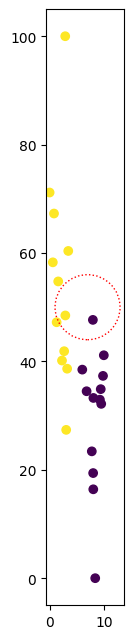

In [103]:
plt.figure(figsize=(1, 10))
plt.scatter(X_train['Variable1'], 
            X_train['Variable2'], 
            c=y_train,  marker='o')
circle = plt.Circle(new_point.to_numpy().ravel(), 6, fill=False, linestyle='dotted', edgecolor='red')
plt.gca().add_patch(circle) 
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

Ahora vamos a estandarizar las variables para que tengan la misma media y desviacion estandar. Esto lo podemos conseguir con el `StandardScaler` del modulo `sklearn.preprocessing`:

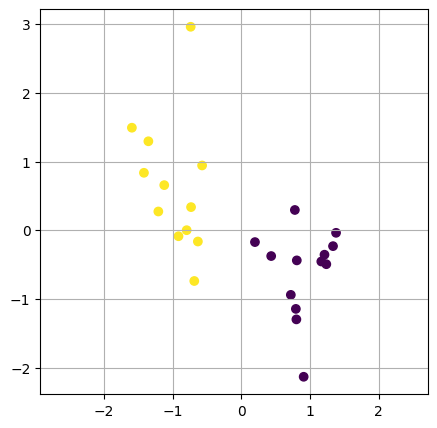

In [105]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Variables estandarizadas
plt.figure(figsize=(5, 5))
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=y_train, marker='o')
plt.axis('equal')
plt.grid(True)
plt.show()

Hay que tener en cuenta que para realizar una clasificacion tambien tendremos que ajustar los datos de prueba. Para ello usamos el metodo `.transform()` sobre los datos de prueba (evaluacion)

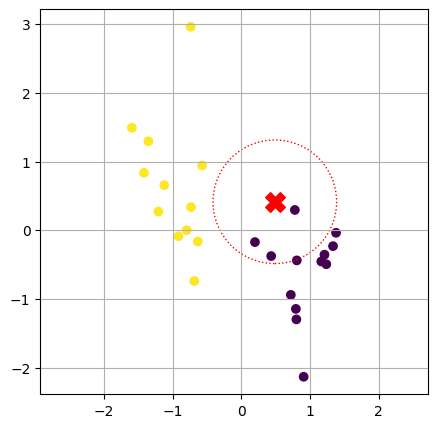

In [107]:
X_test = new_point
X_test_scaled = scaler.transform(X_test)

plt.figure(figsize=(5, 5))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, marker='o')
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c='red', marker='X', s=200) 
plt.axis('equal')
plt.grid(True)

circle = plt.Circle(X_test_scaled[0], 0.9, fill=False, linestyle='dotted', edgecolor='red')
plt.gca().add_patch(circle)

Ahora veamos como afecta que el conjunto de datos este escalado o no. En primer lugar vamos a hacer la clasificacion para los datos que no estan escalados y a continuacion los que si estan escalados y veremos como la `accuracy` cambiara por completo:

In [108]:
modelo, y_pred = entrenar_y_obtener_accuracy(X_train, y_train, X_test, np.array([0]))
y_pred

La accuracy es: 0.00
Matriz de confusión:
 [[0 1]
 [0 0]]


array([1.])

In [109]:
modelo, y_pred = entrenar_y_obtener_accuracy(X_train_scaled, y_train, X_test_scaled, np.array([0]))
y_pred

La accuracy es: 1.00
Matriz de confusión:
 [[1]]


array([0.])

### Ejercicio
Carga los datos de datos05_test.csv y úsalos para evaluar el modelo. Compara cómo se comportaría el modelo sin escalar con la versión buena del modelo escalado.

El punto es de clase: [1. 0. 1. 1. 0. 0. 1. 0. 1. 0.]


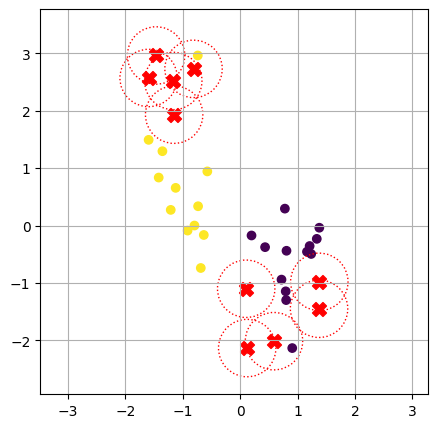

############################################
#          Sin escalado de datos           #
############################################
La accuracy es: 1.00
Matriz de confusión:
 [[5 0]
 [0 5]]
[1. 0. 1. 1. 0. 0. 1. 0. 1. 0.]
############################################
#           Escalando los datos            #
############################################
La accuracy es: 1.00
Matriz de confusión:
 [[5 0]
 [0 5]]
[1. 0. 1. 1. 0. 0. 1. 0. 1. 0.]


In [127]:
from sklearn.preprocessing import StandardScaler

# Cargamos los datos de prueba
df_test = pd.read_csv('datos05_test.csv')
df_train = pd.read_csv('datos05_train.csv')

# Dividimos en variables (X) y clase (y)
X_test = df_test[['Variable1', 'Variable2']]
y_test = df_test['Clase']

X_train = df_train[['Variable1', 'Variable2']]
y_train = df_train['Clase']

# Entrenar el modelo
modelo = KNeighborsClassifier(n_neighbors=3)
modelo.fit(X_train, y_train)
# Clasificar el nuevo objeto
predicted_class = modelo.predict(X_test)
print("El punto es de clase:", predicted_class)


# Variables estandarizadas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

plt.figure(figsize=(5, 5))
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1], c=y_train, marker='o')     # añadir los datos de entrenamiento (o)
plt.scatter(X_test_scaled[:,0], X_test_scaled[:,1], c='red', marker='X', s=100) # añadir los datos de prueba (x)

for i in range(len(X_test_scaled)):
    circle = plt.Circle((X_test_scaled[i,0], X_test_scaled[i,1]), 0.5, fill=False, linestyle='dotted', edgecolor='red')
    plt.gca().add_patch(circle)

plt.axis('equal')
plt.grid(True)
plt.show()



print('############################################')
print('#          Sin escalado de datos           #')
print('############################################')
# Entrenar el modelo sin escalar y obtener la accuracy
modelo, y_pred = entrenar_y_obtener_accuracy(X_train, y_train, X_test, y_test)
print(y_pred)

print('############################################')
print('#           Escalando los datos            #')
print('############################################')
# Entrenamos el modelo escalado y obtenemos la accuracy
modelo, y_pred = entrenar_y_obtener_accuracy(X_train_scaled, y_train, X_test_scaled, y_test)
print(y_pred)


Veamos ahora como se comportarian los datos en caso de que no estuviesen escalados (graficamente):

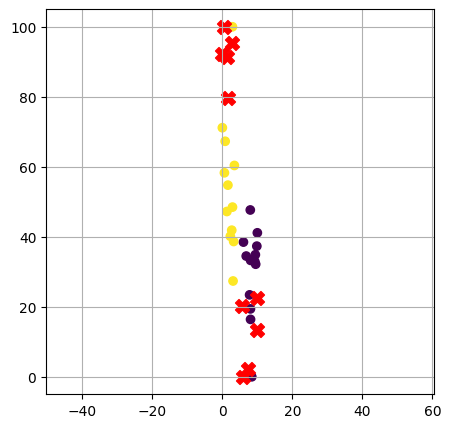

In [122]:
# Cargamos los datos de prueba
df_test = pd.read_csv('datos05_test.csv')
df_train = pd.read_csv('datos05_train.csv')

# Dividimos en variables (X) y clase (y)
X_test = df_test[['Variable1', 'Variable2']]
y_test = df_test['Clase']

X_train = df_train[['Variable1', 'Variable2']]
y_train = df_train['Clase']

# Mostrar los datos de entrenamiento y prueba
plt.figure(figsize=(5, 5))
plt.scatter(X_train['Variable1'], X_train['Variable2'], c=y_train, marker='o')
plt.scatter(X_test['Variable1'], X_test['Variable2'], c='red', marker='X', s=100)
plt.axis('equal')
plt.grid(True)
plt.show()

**PREGUNTA**: ¿son realmente estos resultados correctos? Parece ser que aunque no se escalen los datos los resultados parecen ser los mismos. Esto puede ser una coincidencia simplemente y hacer que la escala no afecte el resultado de la `accuracy`.

## Variables no numericas

En caso de que un conjunto de datos tenga algunas variables con valores no numericos habra que realizar una transformacion de estas variables para poder llevar a cabo el entrenamiento:

In [131]:
df_train = pd.read_csv('datos06_train.csv')
print(df_train)

X_train = df_train.drop('Etiqueta', axis=1)
y_train = df_train['Etiqueta']

  varCategorica  varNumerica1  varNumerica2 Etiqueta
0             A            10           1.1  Clase 0
1             B            15           3.2  Clase 1
2             A            20           1.3  Clase 0
3             B            25           2.4  Clase 1
4             C            30           6.5  Clase 2
5             C            35           2.6  Clase 2
6             A            40           2.7  Clase 0
7             B            45           1.8  Clase 1
8             C            50           5.9  Clase 2


Habra que separar las variables numericas de las no numericas en primer lugar:

In [132]:
# Variables categóricas
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()
# Variables numéricas
numeric_features = X_train.select_dtypes(include=['number']).columns.tolist()

print("Las variables categóricas son:", categorical_features)
print("Las variables numéricas son:", numeric_features)

Las variables categóricas son: ['varCategorica']
Las variables numéricas son: ['varNumerica1', 'varNumerica2']


Habra que hacer el escalado de la variable categorica, ya que esta en otra escala. Para ello utilizaremos el modulo [`sklearn.preprocessing.OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder)

In [135]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Aplicar las transformaciones a las variables de entrada
X_train_processed = preprocessor.fit_transform(X_train)
X_train_processed

array([[-1.54919334, -1.08526249,  1.        ,  0.        ,  0.        ],
       [-1.161895  ,  0.08016143,  0.        ,  1.        ,  0.        ],
       [-0.77459667, -0.97426974,  1.        ,  0.        ,  0.        ],
       [-0.38729833, -0.36380959,  0.        ,  1.        ,  0.        ],
       [ 0.        ,  1.91154189,  0.        ,  0.        ,  1.        ],
       [ 0.38729833, -0.25281683,  0.        ,  0.        ,  1.        ],
       [ 0.77459667, -0.19732045,  1.        ,  0.        ,  0.        ],
       [ 1.161895  , -0.69678785,  0.        ,  1.        ,  0.        ],
       [ 1.54919334,  1.57856362,  0.        ,  0.        ,  1.        ]])

Ahora tendremos que hacer lo mismo para los datos de prueba:

In [136]:
# Cargar los datos de prueba
df_test = pd.read_csv('datos06_test.csv')
X_test = df_test.drop('Etiqueta', axis=1)
y_test = df_test['Etiqueta']

# Aplicar las transformaciones a las variables de entrada
X_test_processed = preprocessor.transform(X_test)
X_test_processed

array([[-1.54919334, -1.08526249,  1.        ,  0.        ,  0.        ],
       [-1.161895  ,  0.08016143,  0.        ,  1.        ,  0.        ],
       [-0.77459667, -0.97426974,  1.        ,  0.        ,  0.        ],
       [-0.38729833, -0.36380959,  0.        ,  1.        ,  0.        ],
       [ 0.        ,  1.91154189,  0.        ,  0.        ,  1.        ],
       [ 0.38729833, -0.25281683,  0.        ,  0.        ,  1.        ],
       [ 0.77459667, -0.19732045,  1.        ,  0.        ,  0.        ],
       [ 1.161895  , -0.69678785,  0.        ,  1.        ,  0.        ],
       [ 1.54919334,  1.57856362,  0.        ,  0.        ,  1.        ]])

Ahora estamos preparados para entrenar el modelo y categorizar los datos de prueba:

In [137]:
modelo, y_pred = entrenar_y_obtener_accuracy(X_train_processed, y_train, X_test_processed, y_test)
y_pred

La accuracy es: 0.89
Matriz de confusión:
 [[3 0 0]
 [0 3 0]
 [1 0 2]]


array(['Clase 0', 'Clase 1', 'Clase 0', 'Clase 1', 'Clase 2', 'Clase 0',
       'Clase 0', 'Clase 1', 'Clase 2'], dtype=object)

## Imputacion de missing values
Lo mismo que para el caso anterior se aplicaron multiples tecnicas de preprocesado ahora habra que hacer un preprocesado para aquellos tipos de datos no conocidos. Por ejemplo si tenemos datos `np.nan` habra que hacer algo para imputar un dato que sea valido. En el siguiente ejemplo se obtiene la media de los datos validos de la muestra (esto puede introducir error, ya que no es un dato totalmente aleatorio pero si que no es veraz al 100%).

In [138]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(
    missing_values=np.nan, # default
    strategy='mean')

imp.fit([   [1,         2], 
            [np.nan,    3], 
            [7,         6]
        ])

X = [   [np.nan,        2], 
        [6,        np.nan], 
        [7,             6]
    ]

print(imp.transform(X))

[[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


Para las variables categoricas:

In [139]:
import pandas as pd
from sklearn.impute import SimpleImputer

df = pd.DataFrame([ ["a",        "x"],
                    [np.nan,     "y"],
                    ["a",     np.nan],
                    ["b",        "y"]], 
                    dtype="category")

imp = SimpleImputer(strategy="most_frequent")

print(imp.fit_transform(df))

[['a' 'x']
 ['a' 'y']
 ['a' 'y']
 ['b' 'y']]


### Ejercicio
Realiza el entrenamiento para el conjunto de datos almacenados en `datos07_train.csv` cuyos valores faltantes están identificados como -1.

In [150]:
from sklearn.impute import SimpleImputer
# Cargamos los datos de entrenamiento
df_train = pd.read_csv('datos07_train.csv')
# Dividimos en variables (X), pero no tenemos clase (y)


# Prepocesamos los datos

imp = SimpleImputer(
    missing_values=-1, # default
    strategy='mean')

imp.fit(X_train)

X_train_processed = imp.transform(X_train)

print(X_train_processed)


[[52.         93.         15.         72.        ]
 [52.5625     41.         49.25        7.        ]
 [52.5625     60.         80.         40.03225806]
 [52.5625     75.         92.         40.03225806]
 [76.         58.         22.         89.        ]
 [73.         72.         49.25       34.        ]
 [60.         41.         49.25       40.03225806]
 [86.         52.83333333 35.         65.        ]
 [ 1.          5.         90.         14.        ]
 [62.         57.          6.         40.03225806]
 [39.         52.83333333  4.         89.        ]
 [60.         14.          9.         90.        ]
 [27.          9.         79.         40.03225806]
 [60.         71.         44.          8.        ]
 [99.         47.         78.          3.        ]
 [90.         42.         77.         51.        ]
 [62.         62.         47.         62.        ]
 [51.         55.         64.          3.        ]
 [88.         37.         99.         44.        ]
 [ 9.         52.83333333  1.  

# Apuntes sobre fit(), transform() y fit_transform()
`fit()` : used for generating learning model parameters from training data

`transform()` : parameters generated from fit() method,applied upon model to generate transformed data set.

`fit_transform()` : combination of fit() and transform() api on same data set

![Alt text](fit_transform.png)